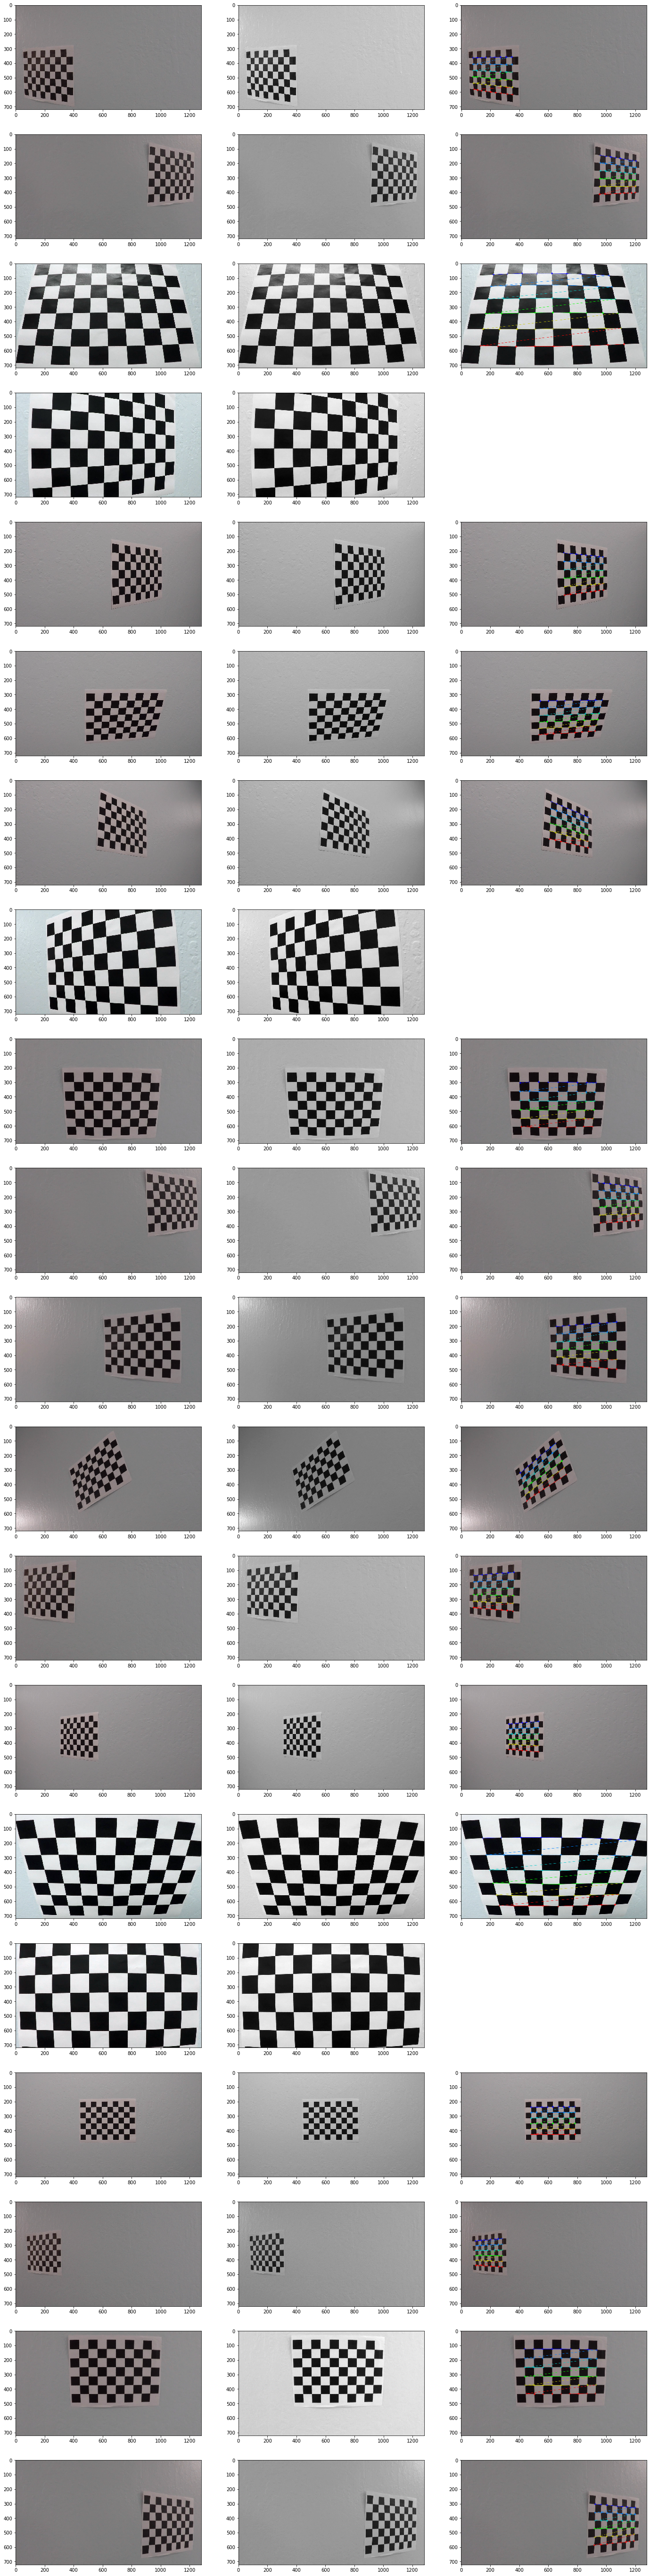

In [84]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt

objp = np.zeros((6 * 9, 3), np.float32);
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2);

objpoints = []
imgpoints = []

calibration_image_files = glob.glob("../camera_cal/calibration*.jpg");

num_files = len(calibration_image_files);

figure = plt.figure(figsize=(24, 100))
figure.tight_layout()

for idx, calibration_image_file in enumerate(calibration_image_files):
    
    img = cv2.imread(calibration_image_file);
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.subplot(num_files, 3, 3 * (idx) + 1)
    plt.imshow(img)
    plt.subplot(num_files, 3, 3 * (idx) + 2)
    plt.imshow(gray, cmap='gray')
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        imgCorners = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        plt.subplot(num_files, 3, 3 * (idx) + 3)
        plt.imshow(img)

plt.show()